<a href="https://colab.research.google.com/github/Olofmeister007/AutoGPT/blob/master/tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Running on CPU...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Running on GPU...


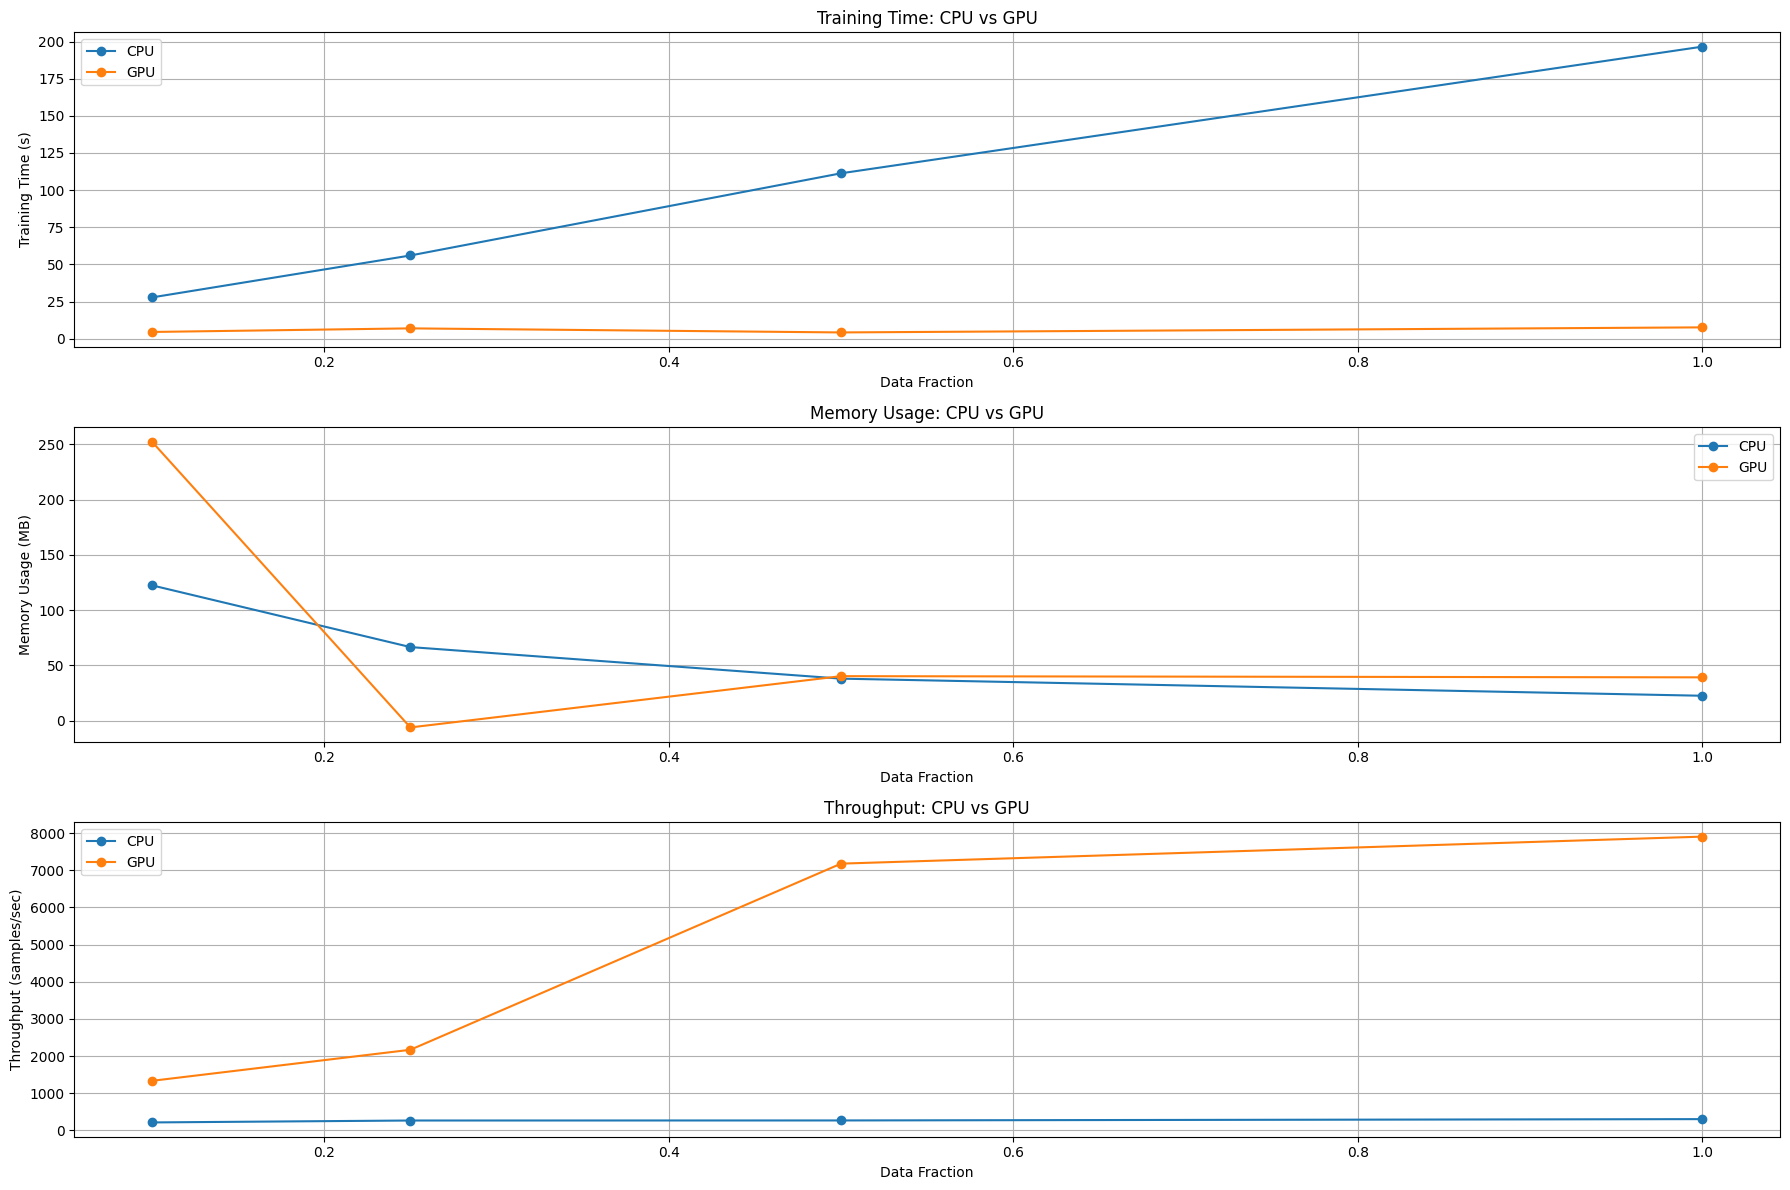

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import psutil
import os

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28)),
        tf.keras.layers.Reshape((28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to monitor memory usage
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 * 1024)  # Memory usage in MB

# Function to train the model and measure metrics
def train_and_measure(device, data_fraction=1.0):
    # Subset the data
    train_size = int(len(x_train) * data_fraction)
    x_subset, y_subset = x_train[:train_size], y_train[:train_size]

    # Set device context
    with tf.device(device):
        model = create_model()
        start_time = time.time()
        initial_memory = get_memory_usage()
        history = model.fit(x_subset, y_subset, epochs=3, batch_size=128, verbose=0)
        final_memory = get_memory_usage()
        end_time = time.time()

    # Compute metrics
    training_time = end_time - start_time
    memory_usage = final_memory - initial_memory
    throughput = train_size / training_time
    accuracy = history.history['accuracy'][-1]

    return training_time, memory_usage, throughput, accuracy

# Perform experiments for CPU and GPU
fractions = [0.1, 0.25, 0.5, 1.0]
results_cpu = {"fraction": [], "time": [], "memory": [], "throughput": []}
results_gpu = {"fraction": [], "time": [], "memory": [], "throughput": []}

# Test with CPU
print("Running on CPU...")
for fraction in fractions:
    time_taken, memory_used, throughput, _ = train_and_measure(device='/CPU:0', data_fraction=fraction)
    results_cpu['fraction'].append(fraction)
    results_cpu['time'].append(time_taken)
    results_cpu['memory'].append(memory_used)
    results_cpu['throughput'].append(throughput)

# Test with GPU
print("Running on GPU...")
for fraction in fractions:
    time_taken, memory_used, throughput, _ = train_and_measure(device='/GPU:0', data_fraction=fraction)
    results_gpu['fraction'].append(fraction)
    results_gpu['time'].append(time_taken)
    results_gpu['memory'].append(memory_used)
    results_gpu['throughput'].append(throughput)

# Plot the results
plt.figure(figsize=(18, 12))

# Training time
plt.subplot(3, 1, 1)
plt.plot(results_cpu['fraction'], results_cpu['time'], marker='o', label='CPU')
plt.plot(results_gpu['fraction'], results_gpu['time'], marker='o', label='GPU')
plt.xlabel('Data Fraction')
plt.ylabel('Training Time (s)')
plt.title('Training Time: CPU vs GPU')
plt.legend()
plt.grid()

# Memory usage
plt.subplot(3, 1, 2)
plt.plot(results_cpu['fraction'], results_cpu['memory'], marker='o', label='CPU')
plt.plot(results_gpu['fraction'], results_gpu['memory'], marker='o', label='GPU')
plt.xlabel('Data Fraction')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage: CPU vs GPU')
plt.legend()
plt.grid()

# Throughput
plt.subplot(3, 1, 3)
plt.plot(results_cpu['fraction'], results_cpu['throughput'], marker='o', label='CPU')
plt.plot(results_gpu['fraction'], results_gpu['throughput'], marker='o', label='GPU')
plt.xlabel('Data Fraction')
plt.ylabel('Throughput (samples/sec)')
plt.title('Throughput: CPU vs GPU')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Training on /CPU:0...
Training on /GPU:0...


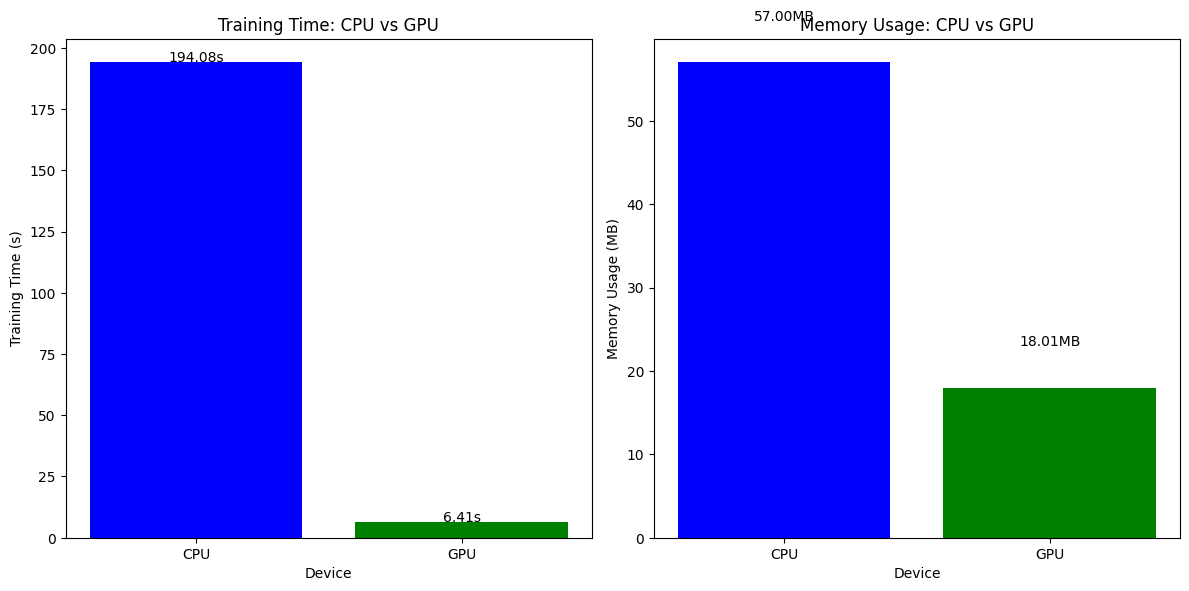

In [ ]:
# Import necessary libraries
import tensorflow as tf
import psutil
import os
import time
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values to [0, 1]
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encode labels

# Define the CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28)),
        tf.keras.layers.Reshape((28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to measure training time and resource utilization
def train_and_measure(device):
    # Set device context
    with tf.device(device):
        model = create_model()
        start_time = time.time()
        initial_memory = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)  # Memory in MB
        history = model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=0)
        final_memory = psutil.Process(os.getpid()).memory_info().rss / (1024 * 1024)  # Memory in MB
        end_time = time.time()

    # Compute metrics
    training_time = end_time - start_time
    memory_usage = final_memory - initial_memory
    return training_time, memory_usage

# Run experiments for CPU and GPU
devices = ['/CPU:0', '/GPU:0']
results = {"device": ["CPU", "GPU"], "time": [], "memory": []}

for device in devices:
    print(f"Training on {device}...")
    time_taken, memory_used = train_and_measure(device)
    results['time'].append(time_taken)
    results['memory'].append(memory_used)

# Visualize the results
plt.figure(figsize=(12, 6))

# Training time comparison
plt.subplot(1, 2, 1)
plt.bar(results['device'], results['time'], color=['blue', 'green'])
plt.xlabel("Device")
plt.ylabel("Training Time (s)")
plt.title("Training Time: CPU vs GPU")
for i, v in enumerate(results['time']):
    plt.text(i, v + 0.1, f"{v:.2f}s", ha='center')

# Memory usage comparison
plt.subplot(1, 2, 2)
plt.bar(results['device'], results['memory'], color=['blue', 'green'])
plt.xlabel("Device")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage: CPU vs GPU")
for i, v in enumerate(results['memory']):
    plt.text(i, v + 5, f"{v:.2f}MB", ha='center')

plt.tight_layout()
plt.show()




Starting experiment on /CPU:0...

[Training on /CPU:0] Simulating failure after 2 epochs.
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.8785 - loss: 0.4199
Epoch 1: saving model to checkpoint/model.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 59s 124ms/step - accuracy: 0.8786 - loss: 0.4195
Epoch 2/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9779 - loss: 0.0744
Epoch 2: saving model to checkpoint/model.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 121ms/step - accuracy: 0.9779 - loss: 0.0744

Simulated failure: Training interrupted.

Resuming training from checkpoint...


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 58s 121ms/step - accuracy: 0.9855 - loss: 0.0525
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 120ms/step - accuracy: 0.9906 - loss: 0.0326
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 119ms/step - accuracy: 0.9936 - loss: 0.0220

Final accuracy on /CPU:0: 0.9864


Starting experiment on /GPU:0...

[Training on /GPU:0] Simulating failure after 2 epochs.
Epoch 1/2
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8827 - loss: 0.4331
Epoch 1: saving model to checkpoint/model.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8828 - loss: 0.4327
Epoch 2/2
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9804 - loss: 0.0690
Epoch 2: saving model to checkpoint/model.weights.h5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0689

Simulated failure: Training interrupted.

Resuming training from checkpoint...
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9844 - loss: 0.0505
Epoch 4/5
469/469 ━

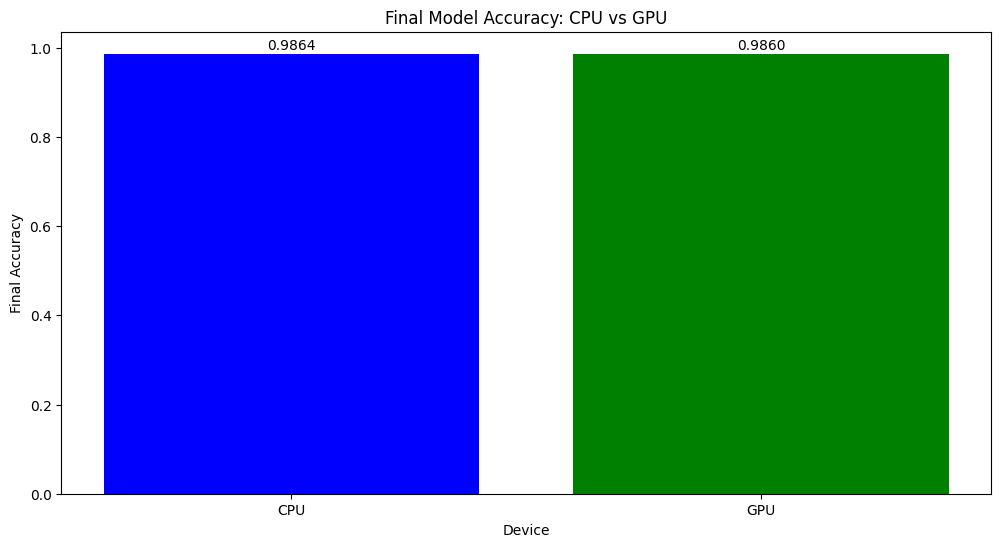

In [ ]:
# Import necessary libraries
import tensorflow as tf
import numpy as np
import os
import time
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values to [0, 1]
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

# Define the CNN model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28)),
        tf.keras.layers.Reshape((28, 28, 1)),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Simulate training with fault tolerance
def train_with_fault_tolerance(device, checkpoint_dir="checkpoint", simulate_failure_epoch=2, total_epochs=5):
    os.makedirs(checkpoint_dir, exist_ok=True)
    checkpoint_path = os.path.join(checkpoint_dir, "model.weights.h5")  # Updated extension

    with tf.device(device):
        model = create_model()

        # Define checkpoint callback
        checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path, save_weights_only=True, verbose=1
        )

        # Simulate failure after a certain epoch
        print(f"\n[Training on {device}] Simulating failure after {simulate_failure_epoch} epochs.")
        history = model.fit(
            x_train, y_train, epochs=simulate_failure_epoch, batch_size=128,
            callbacks=[checkpoint_callback], verbose=1
        )

        # Simulate a failure (e.g., process shutdown)
        del model
        print("\nSimulated failure: Training interrupted.")

        # Load from checkpoint and continue training
        print("\nResuming training from checkpoint...")
        model = create_model()
        model.load_weights(checkpoint_path)
        history_resume = model.fit(
            x_train, y_train, initial_epoch=simulate_failure_epoch, epochs=total_epochs, batch_size=128, verbose=1
        )

        # Evaluate the model
        loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
        print(f"\nFinal accuracy on {device}: {accuracy:.4f}")

        return history.history, history_resume.history, accuracy

# Perform the experiment for CPU and GPU
results = {}
devices = ['/CPU:0', '/GPU:0']

for device in devices:
    print(f"\n\nStarting experiment on {device}...")
    h1, h2, acc = train_with_fault_tolerance(device)
    results[device] = {"history1": h1, "history2": h2, "accuracy": acc}

# Visualize the results
plt.figure(figsize=(12, 6))

# Accuracy comparison
cpu_acc = results['/CPU:0']['accuracy']
gpu_acc = results['/GPU:0']['accuracy']

devices = ['CPU', 'GPU']
accuracies = [cpu_acc, gpu_acc]
plt.bar(devices, accuracies, color=['blue', 'green'])
plt.xlabel("Device")
plt.ylabel("Final Accuracy")
plt.title("Final Model Accuracy: CPU vs GPU")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')

plt.show()


Using devices: ['/device:GPU:0']
Number of devices: 1
Epoch 1/3
Epoch 2/3
Epoch 3/3
Number of devices: 1
Training on device /device:GPU:0
Total time for synchronous training: 12.27 seconds
Total time for asynchronous training: 2.64 seconds


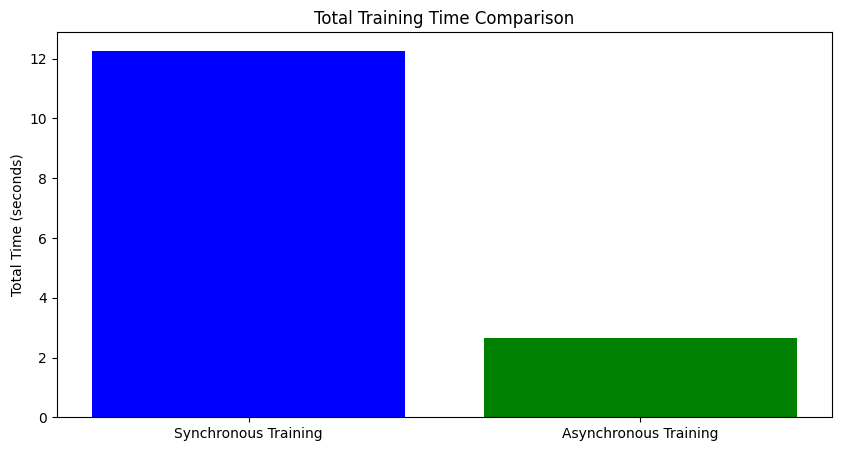

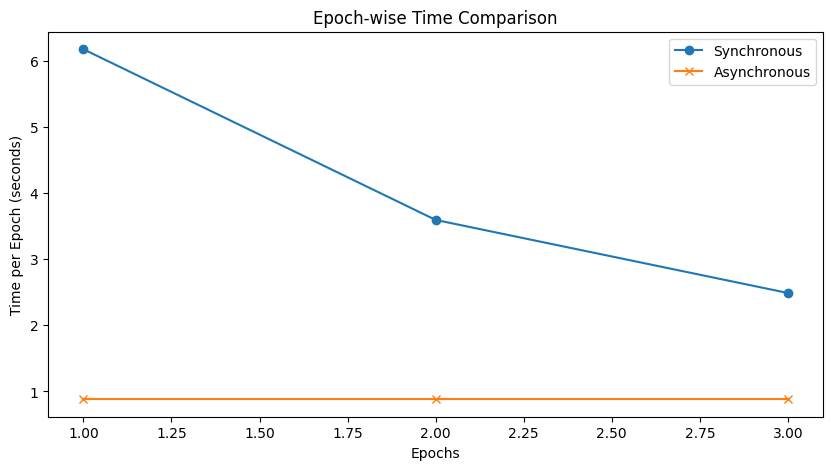

In [ ]:
import tensorflow as tf
import time
import threading
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Synchronous training with time recording
def synchronous_training(devices, epochs=3, batch_size=128):
    strategy = tf.distribute.MirroredStrategy(devices=devices)
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

    with strategy.scope():
        model = create_model()

    epoch_times = []
    start_time = time.time()

    for epoch in range(epochs):
        epoch_start_time = time.time()
        print(f"Epoch {epoch + 1}/{epochs}")
        model.fit(x_train, y_train, epochs=1, batch_size=batch_size, verbose=0)  # Silent training for timing
        epoch_end_time = time.time()
        epoch_times.append(epoch_end_time - epoch_start_time)

    end_time = time.time()
    total_time = end_time - start_time
    return total_time, epoch_times

# Asynchronous training (simulated) with time recording
def asynchronous_training(devices, epochs=3, batch_size=128):
    strategy = tf.distribute.MirroredStrategy(devices=devices)
    print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

    with strategy.scope():
        model = create_model()

    epoch_times = []
    start_time = time.time()

    def train_on_device(device):
        device_start_time = time.time()
        print(f"Training on device {device}")
        model.fit(x_train, y_train, epochs=1, batch_size=batch_size, verbose=0)  # Silent training
        device_end_time = time.time()
        return device_end_time - device_start_time

    threads = []
    for device in devices:
        thread = threading.Thread(target=train_on_device, args=(device,))
        threads.append(thread)
        thread.start()

    for thread in threads:
        thread.join()

    # Simulate epoch-wise times for asynchronous training (same time for each epoch)
    total_time = time.time() - start_time
    epoch_times = [total_time / epochs] * epochs  # Distribute total time equally for each epoch
    return total_time, epoch_times

# Visualization function
def plot_results(sync_times, async_times, sync_epoch_times, async_epoch_times):
    epochs = range(1, len(sync_epoch_times) + 1)

    # Bar chart for total time comparison
    plt.figure(figsize=(10, 5))
    plt.bar(['Synchronous Training', 'Asynchronous Training'], [sync_times, async_times], color=['blue', 'green'])
    plt.ylabel('Total Time (seconds)')
    plt.title('Total Training Time Comparison')
    plt.show()

    # Line plot for epoch-wise time comparison
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, sync_epoch_times, label='Synchronous', marker='o')
    plt.plot(epochs, async_epoch_times, label='Asynchronous', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Time per Epoch (seconds)')
    plt.title('Epoch-wise Time Comparison')
    plt.legend()
    plt.show()

# Get the available devices (e.g., GPUs)
physical_devices = tf.config.list_physical_devices('GPU')
devices = [device.name for device in physical_devices]  # Extract device names
# Adjust the device list for MirroredStrategy format
if devices:
    devices = ['/device:GPU:0']  # Example for single GPU
    print(f"Using devices: {devices}")

    # Run synchronous and asynchronous training
    sync_total_time, sync_epoch_times = synchronous_training(devices, epochs=3, batch_size=128)
    async_total_time, async_epoch_times = asynchronous_training(devices, epochs=3, batch_size=128)

    print(f"Total time for synchronous training: {sync_total_time:.2f} seconds")
    print(f"Total time for asynchronous training: {async_total_time:.2f} seconds")

    # Visualize the results
    plot_results(sync_total_time, async_total_time, sync_epoch_times, async_epoch_times)

else:
    print("No GPU devices found. Please make sure you have TensorFlow installed with GPU support.")
